### **Week 2_Lab**

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood of poisson
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for theta ~ gamma(a,b)
a = 2
b = 1
prior = st.gamma(a, scale= 1/b)

# data in group A(no bachelor's) and posterior distribution
# n = number of observed women, sy = sum of their numbers of children
nA = 111
syA = 217
postA = st.gamma(a+syA, scale=1/(b+nA))

# data in group B(bachelor's) and posterior distribution
nB = 44
syB = 66
postB = st.gamma(a+syB, scale=1/(b+nB))

#### **Group A Bayesian Analysis**

In [2]:
# posterior mean (Group A)
(a+syA)/(b+nA)

1.9553571428571428

In [3]:
# posterior mode (Group A)
(a+syA-1)/(b+nA)

1.9464285714285714

In [4]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA = gamma.ppf(0.025, a+syA, scale = 1/(b+nA))
ubA = gamma.ppf(0.975, a+syA, scale = 1/(b+nA))
(lbA, ubA)

(1.7049431489418194, 2.2226790202451725)

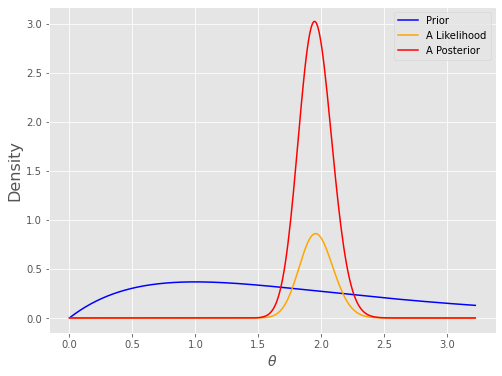

In [5]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')

# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함
plt.plot(thetas, (10**31)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### **Group B Bayesian Analysis**

In [6]:
# posterior mean (Group B)
(a+syB)/(b+nB)

1.511111111111111

In [7]:
# posterior mode (Group B)
(a+syB-1)/(b+nB)

1.488888888888889

In [8]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB = gamma.ppf(0.025, a+syB, scale=1/(b+nB))
ubB = gamma.ppf(0.975, a+syB, scale=1/(b+nB))
(lbB, ubB)

(1.1734369056138325, 1.8908362583954745)

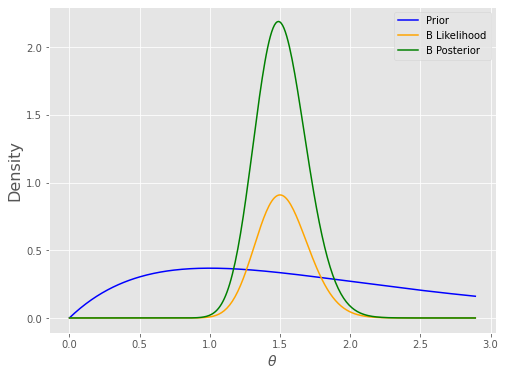

In [9]:

thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함
plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### **Comparing Two Posterior Distributions**

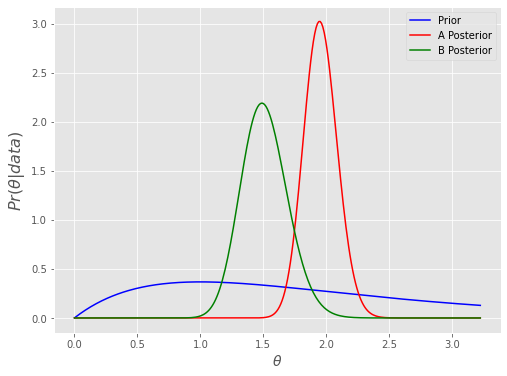

In [10]:

thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

#### **Posterior Predictive Distributions for number of children**

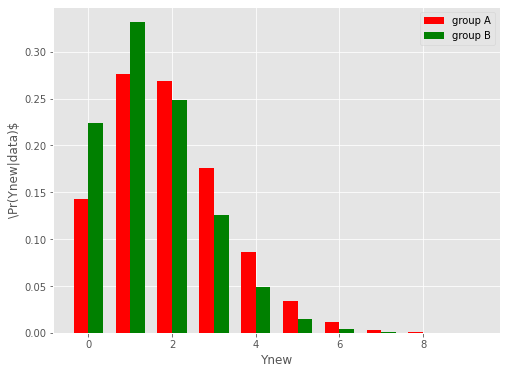

In [11]:
ynew = np.arange(10)
postpredA = st.nbinom.pmf(ynew, a+syA, (b+nA)/(b+nA+1))
postpredB = st.nbinom.pmf(ynew, a+syB, (b+nB)/(b+nB+1))
width = 0.35   # the width of the bars
plt.figure(figsize=(8,6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red')
plt.bar(ynew + width/2, postpredB, width, label='group B', color='green')
plt.xlabel('Ynew')
plt.ylabel(r'\Pr(Ynew|data)$')
plt.legend()
plt.show()

## **Homework**

### **Q1**

#### **1-a)**

In [12]:
y_A= sum([12,9,12,14,13,13,15,8,15,6])
n_A=10

y_B = sum([11,11,10,9,9,8,7,10,6,8,8,9,7])
n_B =13

In [13]:
a_A = 120
b_A = 10
prior_A = st.gamma(a_A, scale=1/b_A)

a_B = 12
b_B =1
prior_B = st.gamma(a_B, scale = 1/b_B)

In [19]:
posterior_A = st.gamma(a_A+y_A,scale= 1/(b_A+n_A))

posterior_B = st.gamma(a_B+y_B,scale = 1/(b_B+n_B))

In [15]:
#Group A's posterior mean

(a_A+y_A)/(b_A+n_A)

11.85

In [16]:
#Group A's posterior variance
(a_A+y_A)/((b_A+n_A))**2


0.5925

In [17]:
# 95% quantile-based CI

lower_A = gamma.ppf(0.025, a_A+y_A, scale=1/(b_A+n_A))
upper_A = gamma.ppf(0.975, a_A+y_A, scale=1/(b_A+n_A))

(lower_A,upper_A)

(10.389238190941795, 13.405448325642006)

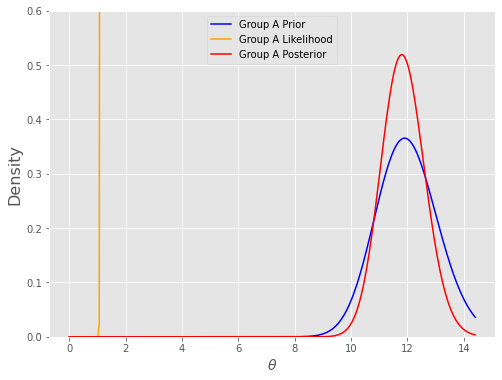

In [20]:
thetas = np.linspace(0.001, upper_A+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior_A.pdf(thetas), label='Group A Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n_A, y_A), label='Group A Likelihood', c='orange')
plt.plot(thetas, posterior_A.pdf(thetas), label='Group A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

In [22]:
# Group B's posterior mean

(a_B+y_B)/(b_B+n_B)

8.928571428571429

In [23]:
# Group B's posterior variance
(a_B+y_B)/((b_B+n_B))**2

0.6377551020408163

In [24]:
# 95% quantile-based CI

lower_B = gamma.ppf(0.025, a_B+y_B, scale=1/(b_B+n_B))
upper_B = gamma.ppf(0.975, a_B+y_B, scale=1/(b_B+n_B))

(lower_B,upper_B)

(7.432064219464302, 10.560308149242363)

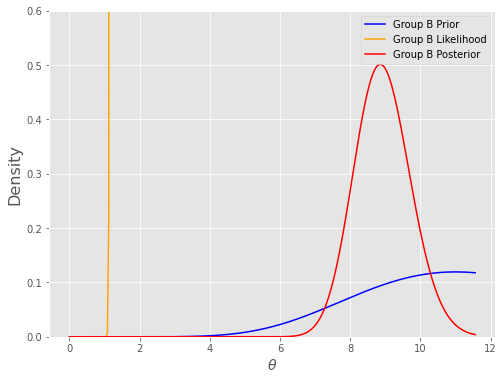

In [25]:
thetas = np.linspace(0.001, upper_B+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior_B.pdf(thetas), label='Group B Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n_B, y_B), label='Group B Likelihood', c='orange')
plt.plot(thetas, posterior_B.pdf(thetas), label='Group B Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

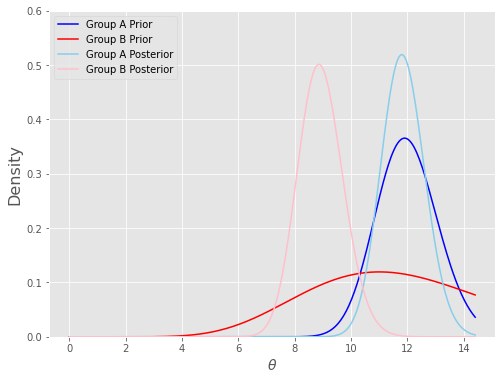

In [26]:
thetas = np.linspace(0.001, upper_A+1,300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior_A.pdf(thetas), label='Group A Prior', c='blue')
plt.plot(thetas, prior_B.pdf(thetas), label='Group B Prior', c='red')
plt.plot(thetas, posterior_A.pdf(thetas), label='Group A Posterior', c='skyblue')
plt.plot(thetas, posterior_B.pdf(thetas), label='Group B Posterior', c='pink')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

#### **1-b)**

In [27]:
mean = [0]
mean = mean*50
for i in range(50):
  mean[i]=(12*(i+1)+y_B)/(i+1+n_B)

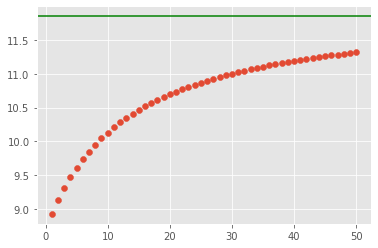

In [30]:
plt.scatter(range(1,51),mean)
plt.axhline(y=(a_A+y_A)/(b_A+n_A),c='green')

n_0가 커질 수록 prior belief가 증가하며 12에 가까워지는 모습

B는 평균이 A에 비해 작기 때문에 더 강한 prior를 주어야 theta_A의 posterior expectation에 가까워질 수 있을 것이다.

#### **1-c)**

A와 B가 서로 영향을 준게 특별히 보이진 않았다.
평균만 동일했고, B의 prior belief도 약하므로 독립으로 봐도 될 것이라 생각한다. 

### **Q2**

In [28]:
from IPython.display import Image

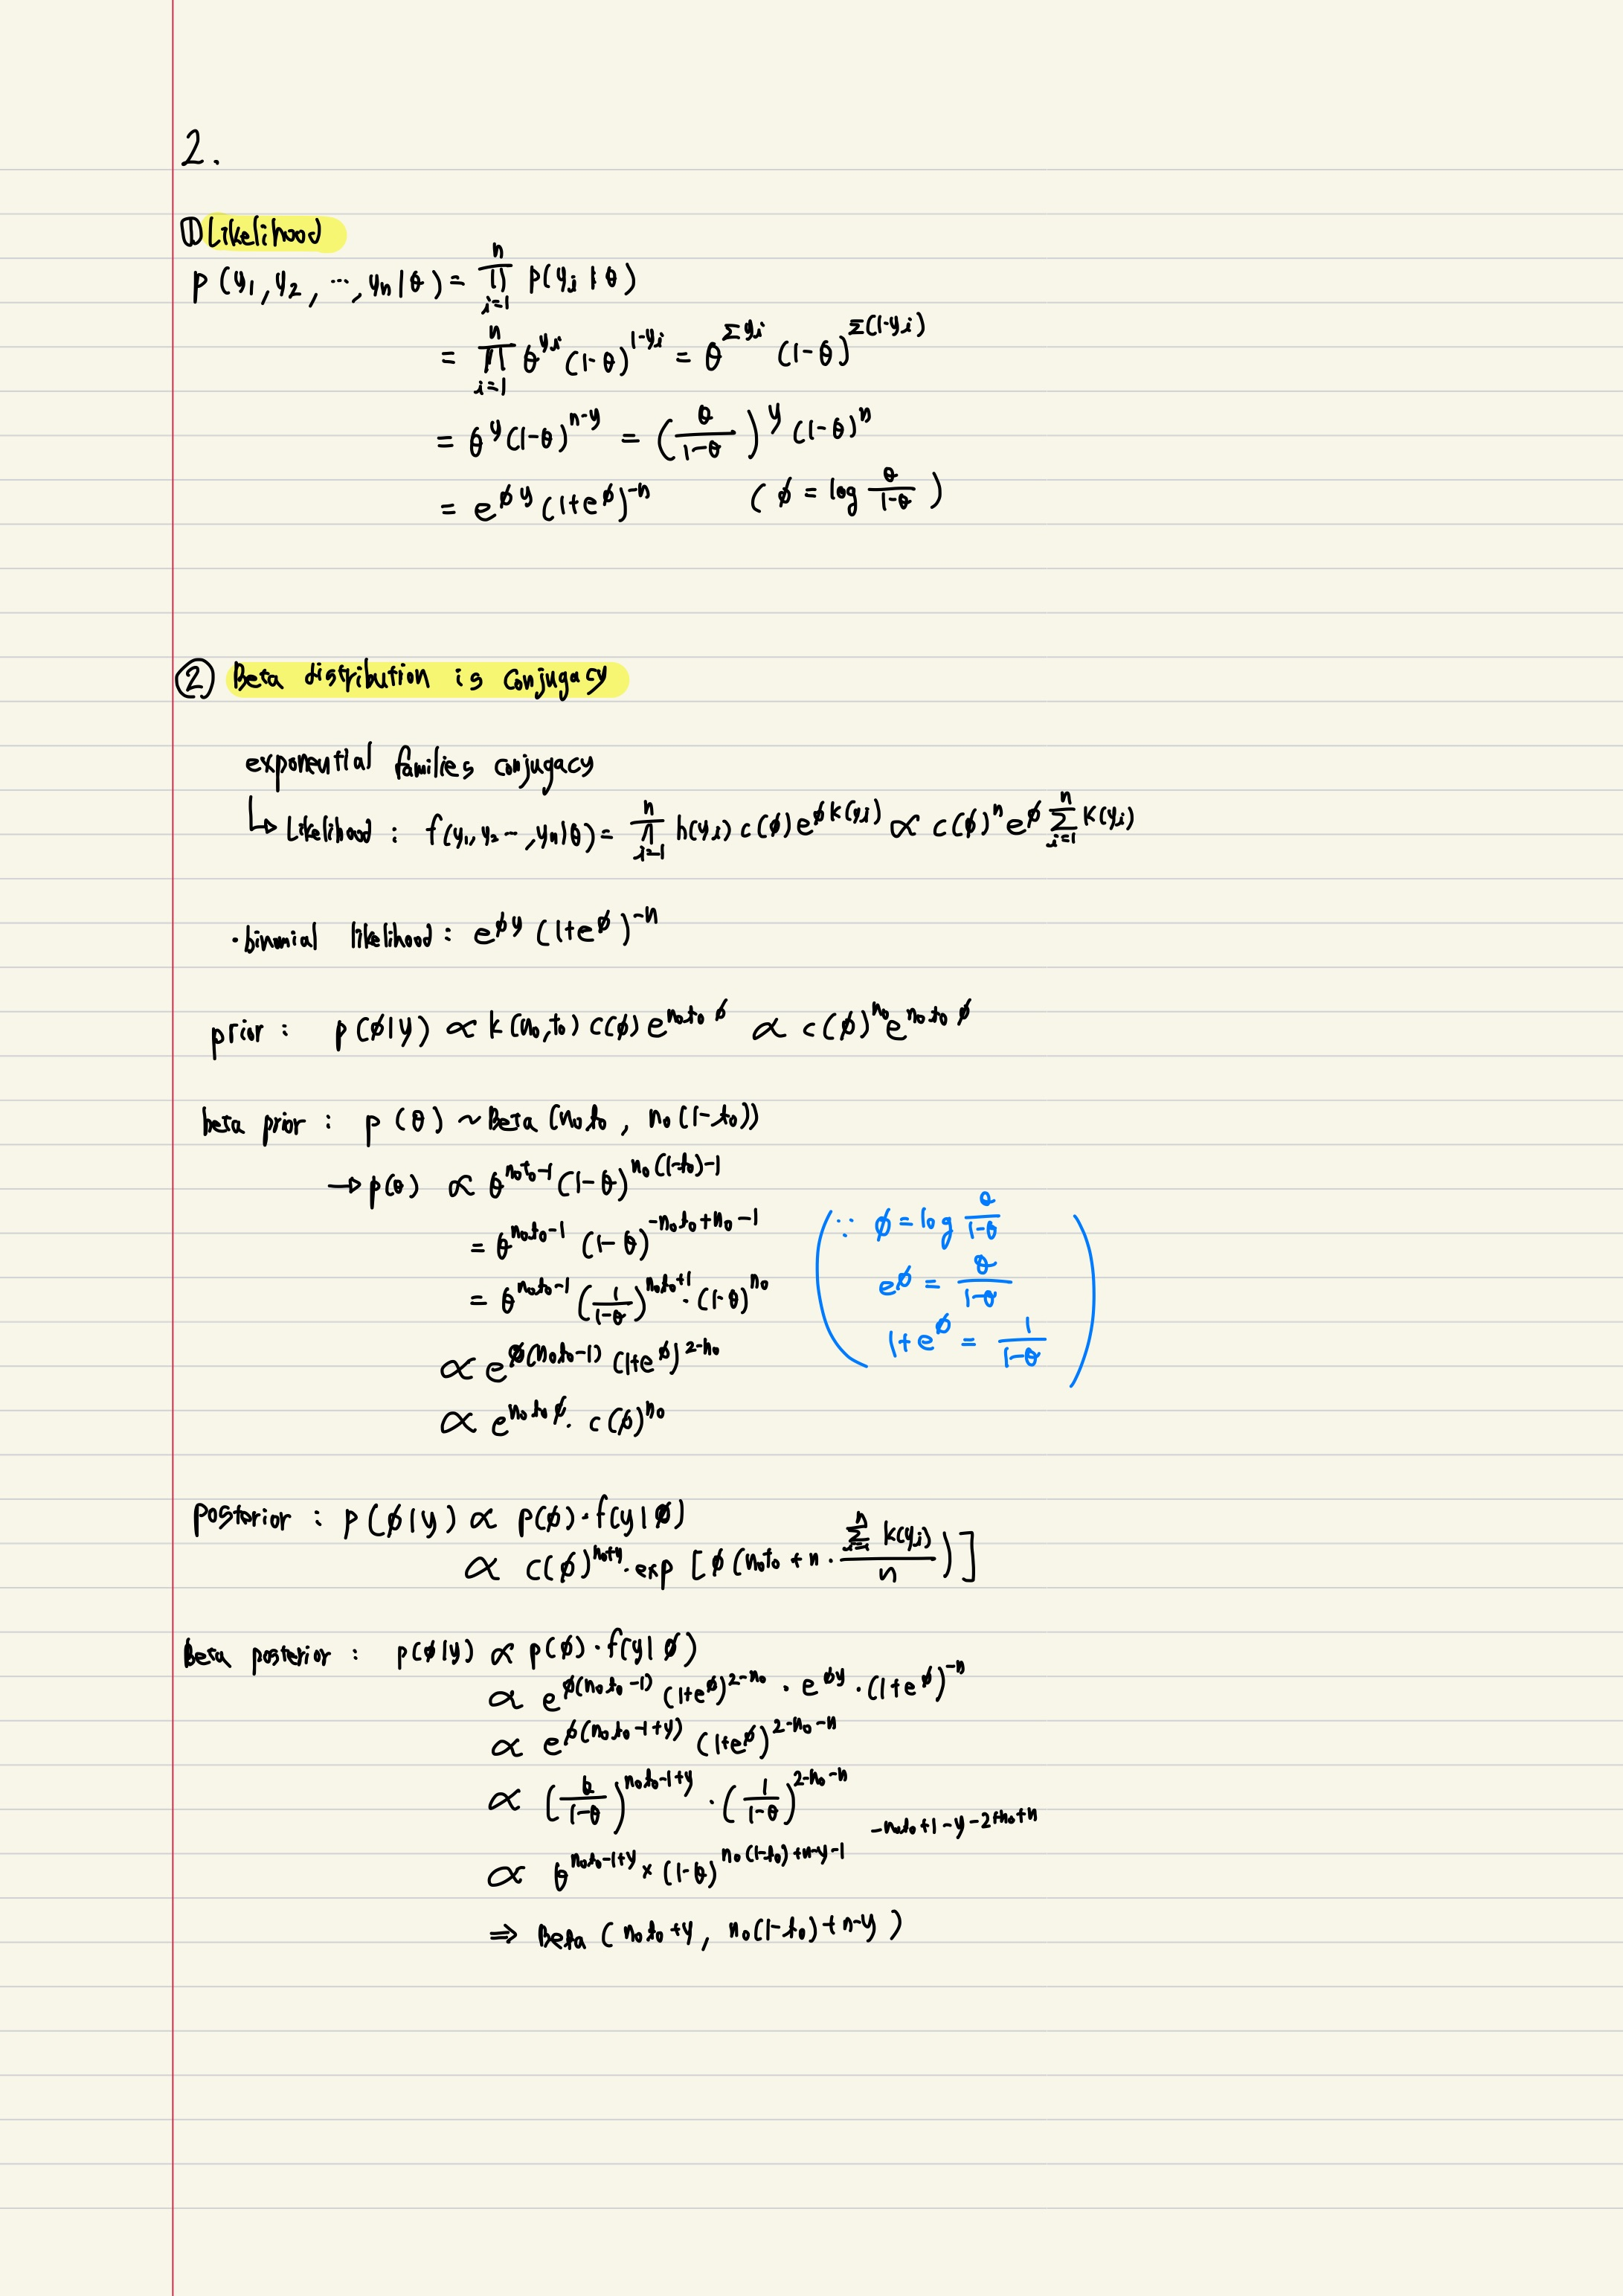

In [29]:
Image("./HW2.jpg")

### **Q3**

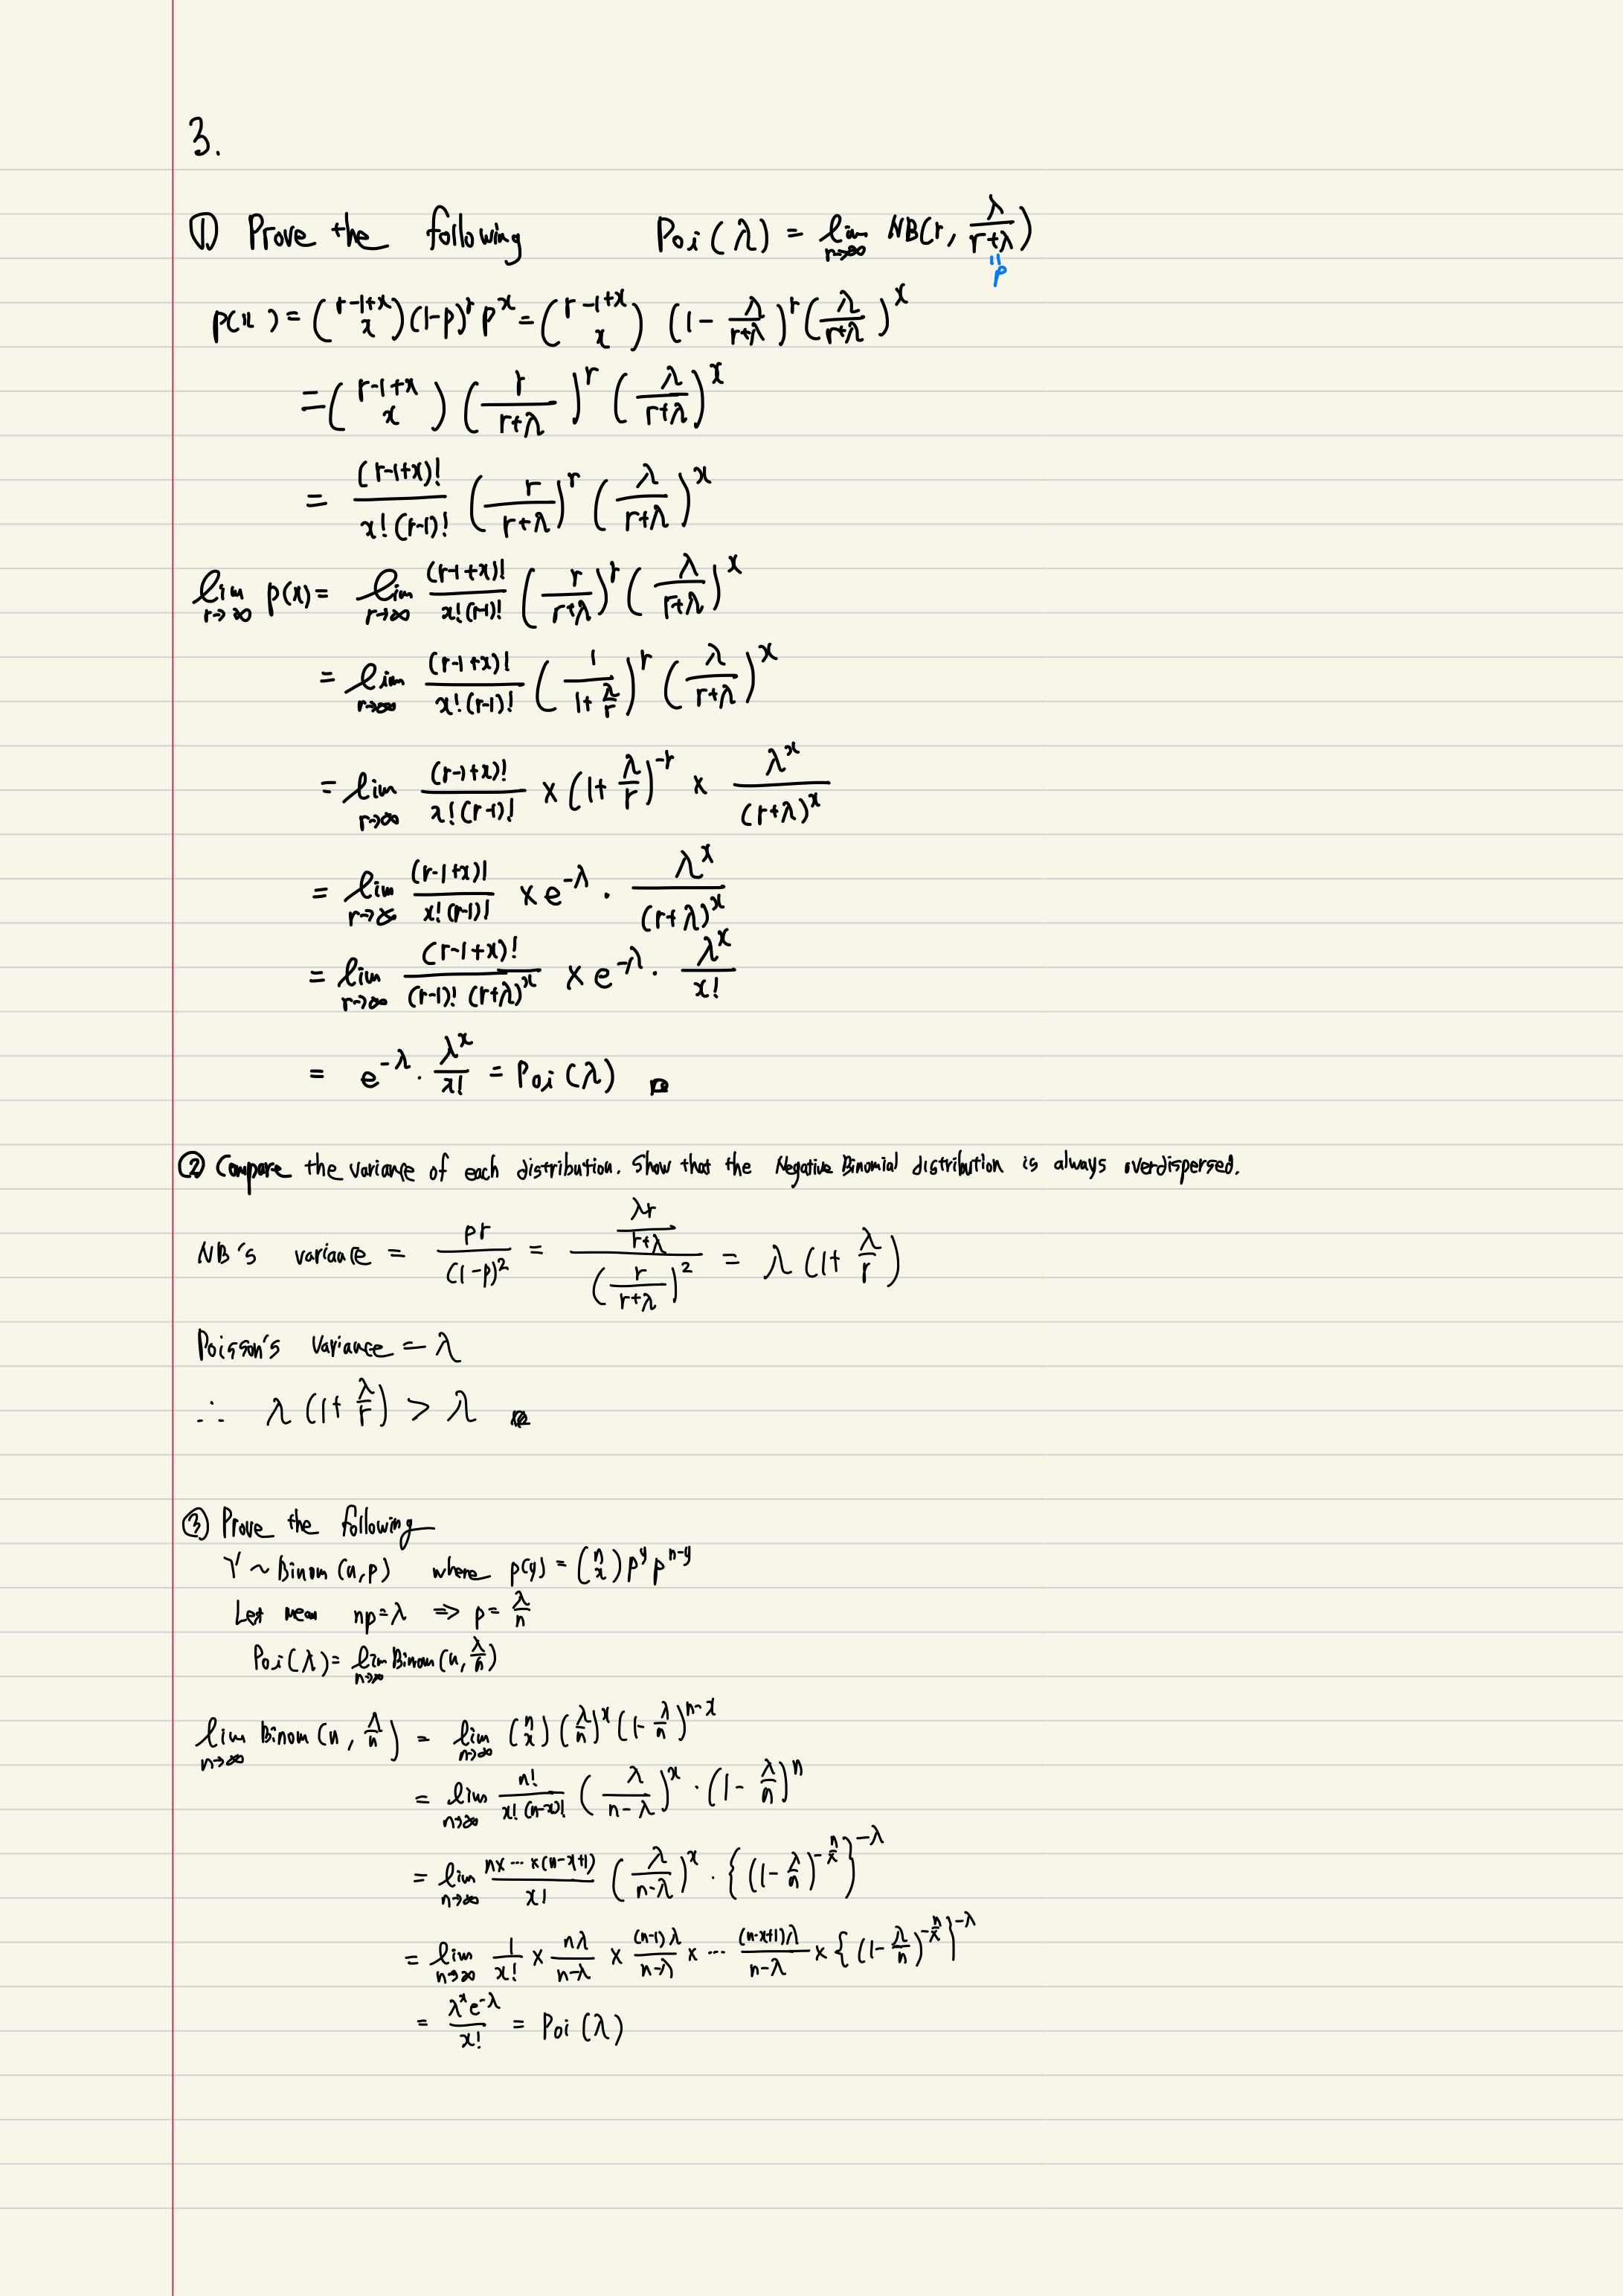

In [30]:
Image("./hw3.jpg")